# lib_audio_dsp pipeline designer

In this file you can generate the DSP pipeline of your choice.

Below you will find 3 cells which can be modified and executed to configure, tune and run the desired pipeline.



1. This is the pipeline design cell. Here you must break the DSP pipeline down into threads and use the provided DSP stages to create a pipeline. Running this cell will produce a diagram showing your pipeline. Make sure to capture each stage in your pipeline as a variable, as it will be needed in the next step.
Note that every time the pipeline cell is changed, the app must be regenerated before the tuning stage can work correctly as the stage indices used for communication may have changed.

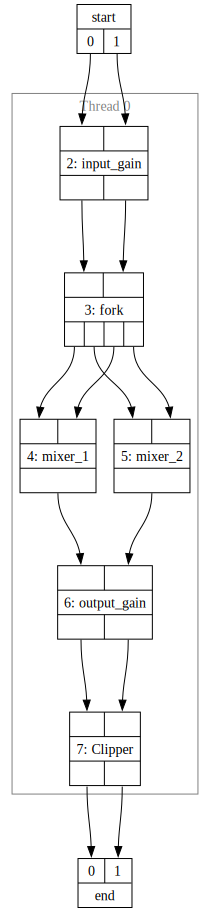

In [1]:
# Pipeline design stage

from audio_dsp.design.pipeline import Pipeline
from audio_dsp.stages import *

p, inputs = Pipeline.begin(2, fs=48000)

# inputs is a list of pipeline inputs. "input gain" is a label for this instance of VolumeControl.
# The new variable x is the output of the input gain VolumeContro and has two elements.
x = p.stage(VolumeControl, inputs, "input_gain")

# Fork the output of the input gain stage.
# The variable x, which now contains four elements, is reassigned as the outputs of the fork stage.
x = p.stage(Fork, x, "fork")

# Pass one pair of the outputs from the fork to a mixer.
# The new variable y holds the outputs from the new mixer.
y = p.stage(Mixer, x[0,2], "mixer_1")

# Pass the other pair of the outputs from the fork to another mixer.
# The new variable z holds the outputs from the new mixer.
z = p.stage(Mixer, x[1,3], "mixer_2")

# Pass the output of mixer 1 and mixer 2 to an output gain stage.
# The variable y is reassigned to the output of this gain stage.
y = p.stage(VolumeControl, y+z, "output_gain")

# Connect output gain to the clipper.
y = p.stage(Clipper, y)

# Finally connect to the output of the pipeline.
p.set_outputs(y)

p.draw()


2. This is the tuning cell. First time through this can be ignored, but once your pipeline is running on a connected device, this cell can be updated and executed to update each pipeline stage live.

KeyError: 'low_pass'

3. This is the build and run cell. This stage generates an application which uses your pipeline. The tuning parameters set in the previous cell are baked in the application.

In [4]:
# Build and run
from audio_dsp.design.pipeline import generate_dsp_main
from audio_dsp.design.build_utils import XCommonCMakeHelper

b = XCommonCMakeHelper()
generate_dsp_main(p)

b.configure_build_run()

Accordion(children=(HTML(value=''),), titles=('Configuring...',))

Accordion(children=(HTML(value=''),), titles=('Compiling...',))

Accordion(children=(HTML(value=''),), titles=('Running...',))

Done!
